In [1]:
import numpy as np
import math
from sklearn.model_selection import train_test_split
from data import *
from evaluation import *
%matplotlib inline

### 加载数据集

In [2]:
data_dir = 'u.data' 
N, M, data_list, _ = load_data(file_dir=data_dir)
print(' data length: %d \n user number: %d \n item number: %d' %(len(data_list),N,M))

 data length: 100000 
 user number: 943 
 item number: 1682


### 分割数据集

In [3]:
train_list, test_list = train_test_split(data_list,test_size=0.2)
print ('train length: %d \n test length: %d' %(len(train_list),len(test_list)))

train length: 80000 
 test length: 20000


### 将 list 转换成 矩阵

In [4]:
train_mat = sequence2mat(sequence = train_list, N = N, M = M)
test_mat = sequence2mat(sequence = test_list, N = N, M = M)

### 参数设置

In [11]:
users_num = N            #用户数
items_num = M            #商品数
hidden_size = 500        #隐层节点数目，即用户的嵌入空间维度
batch_size = 256         #batch大小
lamda_regularizer = 1e-3 #正则项系数
learning_rate = 1e-3  #学习率
epoches  = 100
embedding_size = 8

### 1. MLP

epoch:0  loss=13.8889; 
 MAE=3.4817; RMSE=3.6595; Recall=0.0163; Precision=0.0346; Hit=0.0163; NDCG=0.0071
epoch:10  loss=1.3124; 
 MAE=0.8106; RMSE=1.0135; Recall=0.0547; Precision=0.1160; Hit=0.0547; NDCG=0.0277
epoch:20  loss=1.0300; 
 MAE=0.7608; RMSE=0.9597; Recall=0.0435; Precision=0.0924; Hit=0.0435; NDCG=0.0196
epoch:30  loss=0.7246; 
 MAE=0.7514; RMSE=0.9500; Recall=0.0374; Precision=0.0792; Hit=0.0374; NDCG=0.0163
epoch:40  loss=0.9613; 
 MAE=0.7498; RMSE=0.9474; Recall=0.0362; Precision=0.0767; Hit=0.0362; NDCG=0.0158
epoch:50  loss=0.8649; 
 MAE=0.7477; RMSE=0.9462; Recall=0.0327; Precision=0.0694; Hit=0.0327; NDCG=0.0146
epoch:60  loss=1.0315; 
 MAE=0.7472; RMSE=0.9458; Recall=0.0328; Precision=0.0695; Hit=0.0328; NDCG=0.0146
epoch:70  loss=1.2084; 
 MAE=0.7473; RMSE=0.9456; Recall=0.0301; Precision=0.0637; Hit=0.0301; NDCG=0.0137
epoch:80  loss=1.0308; 
 MAE=0.7456; RMSE=0.9456; Recall=0.0279; Precision=0.0593; Hit=0.0279; NDCG=0.0128
epoch:90  loss=0.7231; 
 MAE=0.7475; 

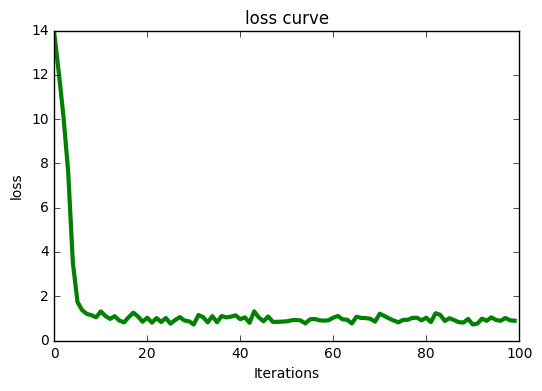

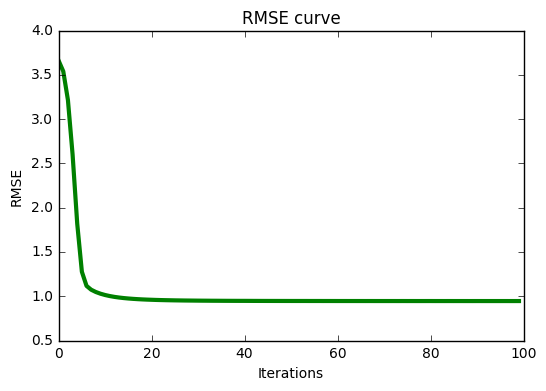

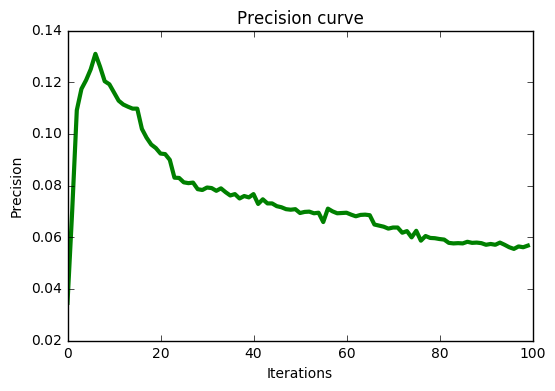

In [9]:
from mlp import *
learning_rate = 1e-4  #学习率
hidden_sizes = [embedding_size,int(embedding_size/2)]
model = mlp(users_num = users_num,
            items_num = items_num,
            embedding_size = embedding_size,
            hidden_sizes = hidden_sizes,
            learning_rate = learning_rate,
            lamda_regularizer = lamda_regularizer,
            batch_size = batch_size)

records_list = []
input_data = train_list
for epoch in range(epoches):
    data_mat = np.random.permutation(input_data) 
    loss = model.train(data_sequence=data_mat)
    pred_mat = model.predict_ratings(data_sequence=test_list)
    mae, rmse, recall, precision = evaluation(pred_mat, train_mat, test_mat)
    records_list.append([loss[-1],mae, rmse, recall, precision])
    if epoch % 10==0:
        topn = get_topn(pred_mat, train_mat, n=10)
        hit_list, ndcg_list = hit_ndcg(test_sequence=np.array(test_list), ranklist=topn)
        hit, ndcg = np.array(hit_list).mean(),np.array(ndcg_list).mean()
        print('epoch:%d  loss=%.4f; \n MAE=%.4f; RMSE=%.4f; Recall=%.4f; Precision=%.4f; Hit=%.4f; NDCG=%.4f'
              %(epoch, loss[-1], mae, rmse, recall, precision, hit, ndcg))

figure(values_list=np.array(records_list)[:,0],name='loss')
figure(values_list=np.array(records_list)[:,2],name='RMSE')
figure(values_list=np.array(records_list)[:,-1],name='Precision')